# Name-Shubham Devidas Paraye
Email-shubhamparaye5@gmail.com

Task1-Data Cleaning and EDA

# Hospitality Minds

Project Name= Hotel Bookingd and cancelation analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option ("display.max_columns", 36)

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
booking_hotels=pd.read_csv('Hospitality minds dataset.csv')
booking_hotels.head(5)

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Adults,Children,Kids,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,2,0.0,0,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,2,0.0,0,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,1,0.0,0,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,3,0.0,0,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,2,0.0,0,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313


In [3]:
booking_hotels.describe()

,Year,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Adults,Children,Kids,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Cancellation,Booking_Done
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,89998.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2016.168711,27.122456,16.408356,0.908433,2.526967,1.857967,0.104513,0.009667,0.031300,0.058300,0.138289,0.228178,1.306944,101.745815,0.063956,0.623367,0.373722,107.271256
std,0.708918,13.589391,9.083017,1.002316,1.851936,0.525628,0.399714,0.099309,0.174128,0.430933,1.456766,0.658184,13.365843,47.853487,0.245265,0.817632,0.483794,111.192091
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,19.000000
50%,2016.000000,27.000000,17.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000
75%,2017.000000,38.000000,25.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000,163.000000
max,2017.000000,53.000000,31.000000,14.000000,35.000000,26.000000,3.000000,2.000000,1.000000,26.000000,66.000000,16.000000,391.000000,437.000000,2.000000,5.000000,1.000000,629.000000


In [4]:
booking_hotels.groupby(['Month','Year']).count()

Type_of_Hotel  Reservation_Date  Arrival_week  Arrival_Date  \
Month     Year                                                                
April     2016           4066              4066          4066          4066   
          2017           4210              4210          4210          4210   
August    2015           2980              2980          2980          2980   
          2016           3958              3958          3958          3958   
          2017           3858              3858          3858          3858   
December  2015           2174              2174          2174          2174   
          2016           2851              2851          2851          2851   
February  2016           2817              2817          2817          2817   
          2017           3158              3158          3158          3158   
January   2016           1828              1828          1828          1828   
          2017           2778              2778          2778          2778   
July      2015           1976              1976          1976          1976   
          2016           3385              3385          3385          3385   
          2017           3973              3973          3973          3973   
June      2016           3940              3940          3940          3940   
          2017           4660              4660          4660          4660   
March     2016           3640              3640          3640          3640   
          2017           3885              3885          3885          3885   
May       2016           4286              4286          4286          4286   
          2017           4966              4966          4966          4966   
November  2015           1757              1757          1757          1757   
          2016           2951              2951          2951          2951   
October   2015           3789              3789          3789          3789   
          2016           4480              4480          4480          4480   
September 2015           3628              3628          3628          3628   
          2016           4006              4006          4006          4006   

                Weekend_Stays  Weekday_Stays  Meal  Booking_Payment  Adults  \
Month     Year                                                                
April     2016           4066           4066  4066             4066    4066   
          2017           4210           4210  4210             4210    4210   
August    2015           2980           2980  2980             2980    2980   
          2016           3958           3958  3958             3958    3958   
          2017           3858           3858  3858             3858    3858   
December  2015           2174           2174  2174             2174    2174   
          2016           2851           2851  2851             2851    2851   
February  2016           2817           2817  2817             2817    2817   
          2017           3158           3158  3158             3158    3158   
January   2016           1828           1828  1828             1828    1828   
          2017           2778           2778  2778             2778    2778   
July      2015           1976           1976  1976             1976    1976   
          2016           3385           3385  3385             3385    3385   
          2017           3973           3973  3973             3973    3973   
June      2016           3940           3940  3940             3940    3940   
          2017           4660           4660  4660             4660    4660   
March     2016           3640           3640  3640             3640    3640   
          2017           3885           3885  3885             3885    3885   
May       2016           4286           4286  4286             4286    4286   
          2017           4966           4966  4966             4966    4966   
November  2015           1757           1757  1757             17

July and August have 3 rows compared to other months. This would be taken into account into the project.

In [5]:
booking_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type_of_Hotel        90000 non-null  object 
 1   Year                 90000 non-null  int64  
 2   Month                90000 non-null  object 
 3   Reservation_Date     90000 non-null  object 
 4   Arrival_week         90000 non-null  int64  
 5   Arrival_Date         90000 non-null  int64  
 6   Weekend_Stays        90000 non-null  int64  
 7   Weekday_Stays        90000 non-null  int64  
 8   Meal                 90000 non-null  object 
 9   Booking_Payment      90000 non-null  object 
 10  Adults               90000 non-null  int64  
 11  Children             89998 non-null  float64
 12  Kids                 90000 non-null  int64  
 13  Country              89629 non-null  object 
 14  Booking_Type         90000 non-null  object 
 15  Repeated_Guest       90000 non-null 

In [6]:
booking_hotels.Meal

0           Bed & Breakfast
1           Bed & Breakfast
2           Bed & Breakfast
3           Bed & Breakfast
4        Breakfast & Dinner
                ...        
89995       Bed & Breakfast
89996    Breakfast & Dinner
89997       Bed & Breakfast
89998    Breakfast & Dinner
89999       Bed & Breakfast
Name: Meal, Length: 90000, dtype: object

# To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values and replace those with integers.#

In [7]:
booking_hotels.isnull().sum()

Type_of_Hotel            0
Year                     0
Month                    0
Reservation_Date         0
Arrival_week             0
Arrival_Date             0
Weekend_Stays            0
Weekday_Stays            0
Meal                     0
Booking_Payment          0
Adults                   0
Children                 2
Kids                     0
Country                371
Booking_Type             0
Repeated_Guest           0
Prev_Cancel              0
History                  0
Reserved_Room            0
Assigned_Room            0
Booking_Changes          0
Waiting_List             0
Customer                 0
Per_Day_Charges          0
Parking_at_premises      0
Physical_Challenged      0
Reservation_Status       0
Cancellation             0
Booking_Done             0
dtype: int64

In [8]:
booking_hotels['Country'].fillna('XYZ',inplace=True)
booking_hotels['Children'].fillna(0,inplace=True)
booking_hotels['Children']=booking_hotels['Children'].astype(int)

In [9]:
booking_hotels.columns

Index(['Type_of_Hotel', 'Year', 'Month', 'Reservation_Date', 'Arrival_week',
       'Arrival_Date', 'Weekend_Stays', 'Weekday_Stays', 'Meal',
       'Booking_Payment', 'Adults', 'Children', 'Kids', 'Country',
       'Booking_Type', 'Repeated_Guest', 'Prev_Cancel', 'History',
       'Reserved_Room', 'Assigned_Room', 'Booking_Changes', 'Waiting_List',
       'Customer', 'Per_Day_Charges', 'Parking_at_premises',
       'Physical_Challenged', 'Reservation_Status', 'Cancellation',
       'Booking_Done'],
      dtype='object')

In [10]:
selected_column=['Type_of_Hotel', 'Year', 'Month', 'Reservation_Date', 'Arrival_week',
       'Arrival_Date', 'Weekend_Stays', 'Weekday_Stays', 'Meal',
       'Booking_Payment', 'Adults', 'Children','Country',
       'Booking_Type', 'Repeated_Guest', 'Prev_Cancel', 'History',
       'Reserved_Room', 'Assigned_Room', 'Booking_Changes', 'Waiting_List',
       'Customer', 'Per_Day_Charges', 'Parking_at_premises',
       'Physical_Challenged', 'Reservation_Status', 'Cancellation',
       'Booking_Done']

In [11]:
booking_hotels_df=booking_hotels[selected_column].copy()

In [12]:
booking_hotels_df['Total_guest']=booking_hotels_df['Adults']+booking_hotels_df['Children']

In [13]:
booking_hotels_df=booking_hotels_df.drop(['Adults', 'Children'],axis=1)

In [14]:
booking_hotels_df=booking_hotels_df[booking_hotels_df.Total_guest >0]

In [15]:
booking_hotels_df.head(10)

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Total_guest
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44,2
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27,2
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180,1
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59,3
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313,2
5,Villa,2016,February,02-03-2016,10,29,2,1,Bed & Breakfast,No Deposit,ESP,Online TA,0,0,0,D,D,0,0,Transient,90.0,0,1,Check-Out,0,15,2
6,Motel,2017,May,12-01-2017,22,26,0,2,Bed & Breakfast,No Deposit,GBR,Online TA,0,0,0,A,A,0,0,Transient,108.0,0,0,Canceled,1,123,2
7,Motel,2016,September,29-01-2016,39,25,2,2,Bed & Breakfast,No Deposit,DEU,Online TA,0,0,0,D,D,0,0,Transient,123.0,0,0,Canceled,1,290,2
8,Villa,2015,July,04-06-2015,30,21,3,6,Bed & Breakfast,No Deposit,PRT,Website,0,0,0,D,D,0,0,Transient,124.0,0,0,Canceled,1,102,2
9,Villa,2017,June,24-04-2017,22,1,0,2,Bed & Breakfast,No Deposit,PRT,Corporate,0,0,0,A,A,0,0,Transient,105.0,0,0,Canceled,1,81,2


In [16]:
booking_hotels_df['Type_of_Hotel'].unique()

array(['Motel', 'Villa'], dtype=object)

In [17]:
hotels_df=booking_hotels_df[booking_hotels_df.Cancellation == 0]
hotels_df.sample()

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Total_guest
64703,Motel,2016,June,14-06-2016,25,11,1,2,Breakfast & Dinner,No Deposit,DEU,Online TA,0,0,0,F,B,0,0,Transient,176.0,0,3,Check-Out,0,1,2


In [18]:
Motel_hotels_df=hotels_df[hotels_df=="Motel"]
Villa_hotels_df=hotels_df[hotels_df=='Villa']

# 1 Visualizing hotelwise yearly booking



In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [20]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

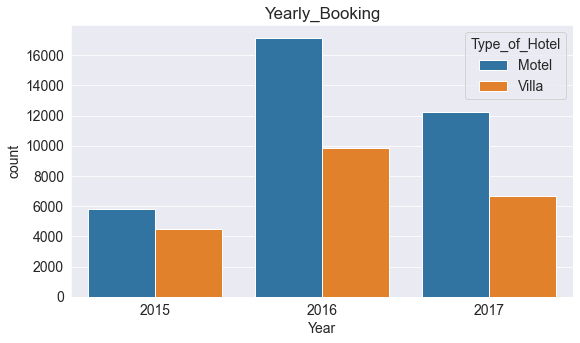

In [21]:
sns.countplot(x='Year',data=hotels_df,hue="Type_of_Hotel").set_title("Yearly_Booking")
plt.show()

# 2. From where the most guests are coming ?

In [23]:
hotels_df['Country'].value_counts()

PRT    15794
GBR     7549
FRA     6130
ESP     5008
DEU     4474
       ...  
MKD        2
MAC        1
JEY        1
ARM        1
BGD        1
Name: Country, Length: 107, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

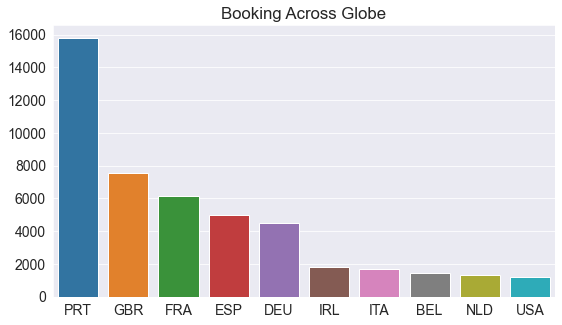

In [24]:
sns.barplot(y=list(hotels_df.Country.value_counts().head(10)),x=list(hotels_df.Country.value_counts().head(10).index)).set_title('Booking Across Globe')
plt.show

In [25]:
hotels_df["Country"].value_counts()

PRT    15794
GBR     7549
FRA     6130
ESP     5008
DEU     4474
       ...  
MKD        2
MAC        1
JEY        1
ARM        1
BGD        1
Name: Country, Length: 107, dtype: int64

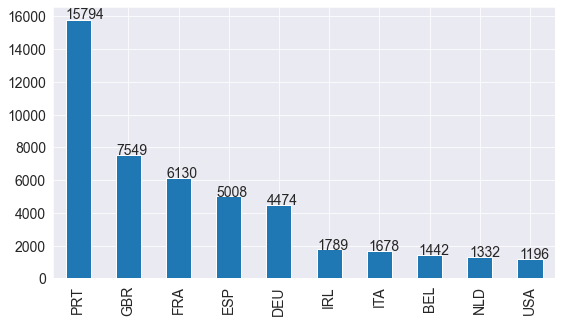

In [26]:
ax= hotels_df.Country.value_counts().head(10).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# 3 Visualizing proportion of booking cancellations vis a vis bookings¶

<AxesSubplot:xlabel='Type_of_Hotel', ylabel='mean'>

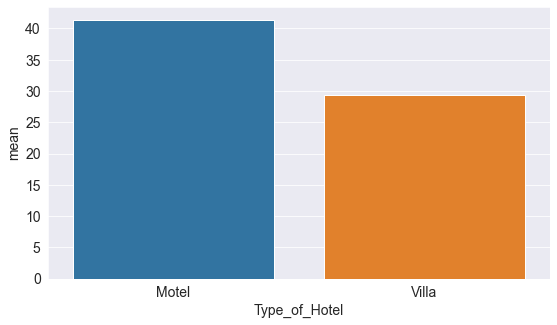

In [27]:
a=booking_hotels_df.groupby('Type_of_Hotel')['Cancellation'].describe()
sns.barplot(x=a.index,y=a['mean']*100)

<AxesSubplot:title={'center':'Booking cancel or not eith hotel type'}, xlabel='Type_of_Hotel', ylabel='count'>

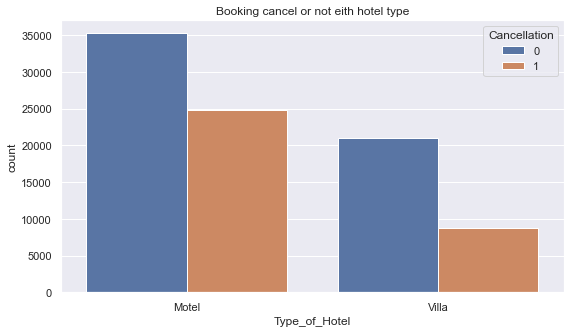

In [28]:
sns.set(style='darkgrid')
plt.title("Booking cancel or not eith hotel type")
sns.countplot(x="Type_of_Hotel",hue='Cancellation',data=booking_hotels_df)

# Interference:More than 40% of hotel is cancel of motel type hotels while less than 30% of villa is cancel¶

# 4 Visualizing monthly bookings and monthly cancellations# 

In [29]:
hotels_df_copy=hotels_df.copy()
hotels_df_copy['No_of_Bookings']=1
hotels_df_copy.loc[(hotels_df_copy.Month=='July')|(hotels_df_copy.Month=='August'),'No_of_Bookings']/=3
hotels_df_copy.loc[~(hotels_df_copy.Month=='July')|(hotels_df_copy.Month=="August"),'No_of_Bookings']/=2
hotels_df_copy.sample(100)

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Total_guest,No_of_Bookings
47349,Motel,2017,April,12-04-2017,14,9,1,2,Room Only,No Deposit,FRA,Online TA,0,0,0,A,D,0,0,Transient,143.0,0,3,Check-Out,0,64,2,0.500000
41848,Motel,2017,April,15-04-2017,15,11,0,3,Room Only,No Deposit,BRA,Online TA,0,0,0,A,A,0,0,Transient,44.0,0,1,Check-Out,0,84,2,0.500000
25225,Villa,2016,December,13-12-2016,52,12,0,1,Bed & Breakfast,No Deposit,PRT,Corporate,1,0,1,A,A,0,0,Transient,33.0,0,0,Check-Out,0,8,1,0.500000
11928,Motel,2016,September,30-09-2016,40,27,1,2,Room Only,No Deposit,BEL,Online TA,0,0,0,A,A,0,0,Transient,120.0,0,1,Check-Out,0,2,2,0.500000
72893,Motel,2016,December,19-12-2016,51,12,3,5,Bed & Breakfast,No Deposit,AUT,Online TA,0,0,0,A,D,4,0,Transient,74.0,0,0,Check-Out,0,87,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65212,Villa,2016,January,06-01-2016,6,2,2,2,Bed & Breakfast,No Deposit,PRT,Online TA,0,0,0,A,C,1,0,Transient,47.0,0,1,Check-Out,0,54,3,0.500000
33549,Motel,2016,April,28-04-2016,18,27,0,1,Bed & Breakfast,No Deposit,PRT,Offline TA/TO,0,0,0,A,E,0,0,Transient-Party,40.0,0,0,Check-Out,0,0,1,0.500000
15657,Villa,2017,April,20-04-2017,16,14,2,4,Bed & Breakfast,No Deposit,DEU,Offline TA/TO,0,0,0,D,D,0,0,Transient,94.0,0,0,Check-Out,0,50,2,0.500000
68702,Villa,2017,April,21-04-2017,16,17,1,3,Breakfast & Dinner,No Deposit,GBR,Online TA,0,0,0,E,E,0,0,Transient,109.0,0,2,Check-Out,0,109,2,0.500000


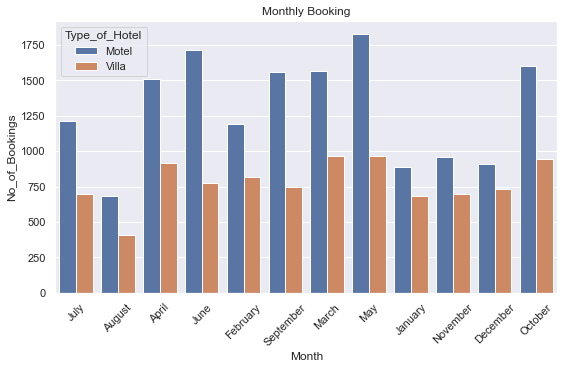

In [30]:
Month_sorted=( 'January','February','March','April','May','June','July', 'August', 'September','October','November','December')
plt.title("Monthly Booking")
sns.barplot(x='Month',y='No_of_Bookings',hue=hotels_df_copy['Type_of_Hotel'],estimator= sum,data=hotels_df_copy)
plt.xticks(rotation = 45)
plt.show()

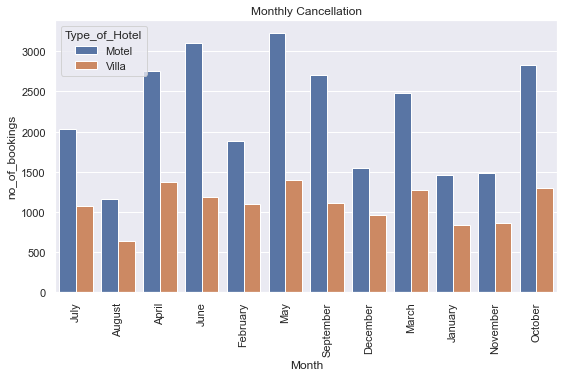

In [31]:
hotels_df_copy1=booking_hotels_df.copy()
hotels_df_copy1['no_of_bookings']=1
hotels_df_copy1.loc[(hotels_df_copy1.Month=='July')|(hotels_df_copy1.Month=='August'),'no_of_bookings']/=3
hotels_df_copy1.loc[~(hotels_df_copy1.Month=='July')|(hotels_df_copy1.Month=='August'),'no_of_bookings']/=2
hotels_df_copy1.sample(100)
b=hotels_df_copy1[hotels_df_copy1.Cancellation==1]
Month_sorted=( 'January','February','March','April','May','June','July', 'August', 'September','October','November','December')
sns.set(style='darkgrid')
plt.title("Monthly Cancellation")
sns.barplot(x='Month',y='no_of_bookings',hue=hotels_df_copy1['Type_of_Hotel'],estimator= sum, data=hotels_df_copy1)
plt.xticks(rotation = 90)
plt.show()

# Inference: In case of Motel type hotel, months with high bookings (April,May, June, September, October) also witnessed more cancellations.Guest numbers for the Resort hotel go down slighty from June to September though variations in bookings and cancellations are less in case of Villa.Both hotels have the fewest guests during the winter.


# 5. Market segment wise bookings

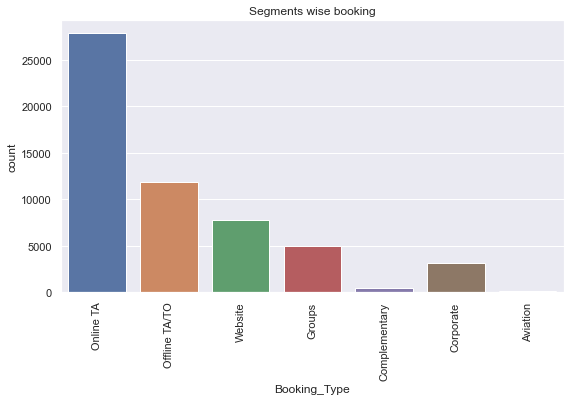

In [32]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "Booking_Type", data =hotels_df )
plt.xticks(rotation = 90)
plt.show()

Inference:Online and ofline booking is higher

# 6 plotting graph of Customer type with cancellation

<AxesSubplot:xlabel='Customer', ylabel='mean'>

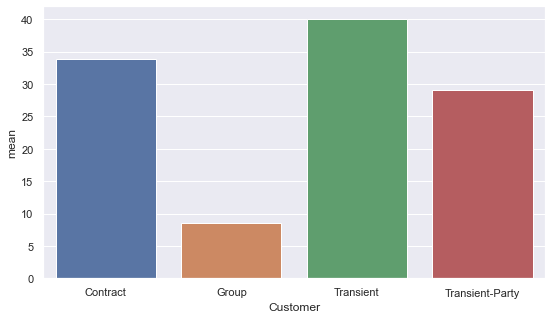

In [33]:
a=booking_hotels_df.groupby('Customer')['Cancellation'].describe()
sns.barplot(x=a.index,y=a['mean']*100)

# Transient customer has higher cancellation

1 Relation between booking done and cancellation

In [34]:
import numpy as np

(array([16277.,  6800.,  5093.,  5063.,  3951.,  3793.,  3544.,  3099.,
         2923.,  2770.,  2569.,  2524.,  2079.,  2042.,  2014.,  2183.,
         1893.,  1852.,  1786.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <BarContainer object of 19 artists>)

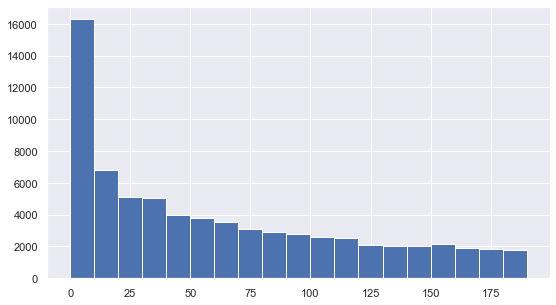

In [35]:
plt.hist(booking_hotels_df.Booking_Done,bins=np.arange(0,200,10))


<AxesSubplot:xlabel='Booking_Done', ylabel='mean'>

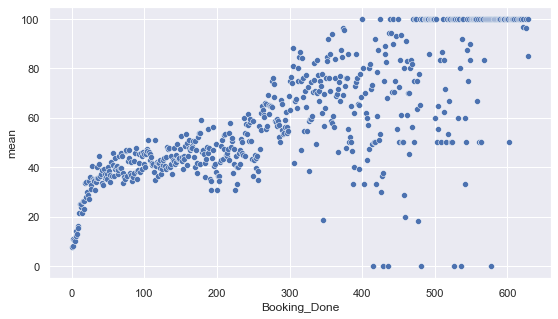

In [36]:
a=booking_hotels_df.groupby('Booking_Done')['Cancellation'].describe()
sns.scatterplot(x=a.index,y=a['mean']*100)

Booking Done column has positive corelation with cancellation

In [37]:
booking_hotels_df[booking_hotels_df.Booking_Payment=='Refundable'].Booking_Payment.count()

64

<AxesSubplot:title={'center':'Booking Cancel or not by booking payment'}, xlabel='Booking_Payment', ylabel='count'>

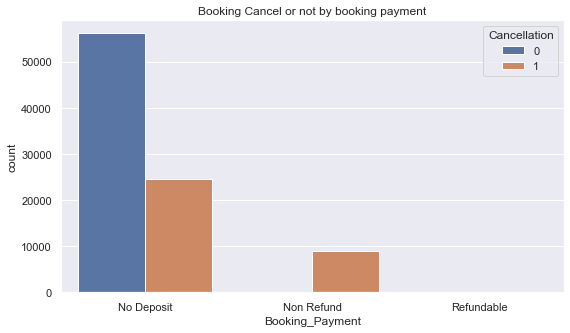

In [38]:
plt.title("Booking Cancel or not by booking payment")
sns.countplot(x='Booking_Payment',data=booking_hotels_df,hue="Cancellation")

Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

<AxesSubplot:title={'center':'Relation between Booking_Type and cancelation'}, xlabel='Booking_Type', ylabel='count'>

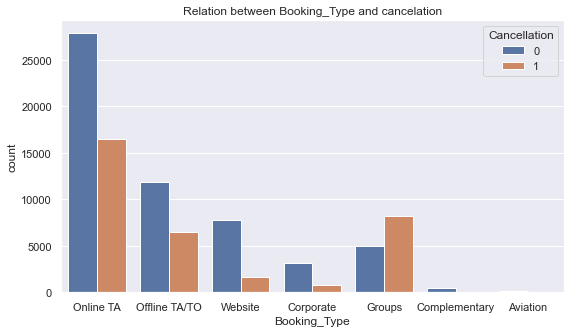

In [39]:
plt.title("Relation between Booking_Type and cancelation")
sns.countplot(x='Booking_Type',data=booking_hotels_df,hue='Cancellation')

Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate.



Relation between previous cancelltion and cancellation

In [40]:
booking_hotels_df[booking_hotels_df.Prev_Cancel==1].count()

Type_of_Hotel          4147
Year                   4147
Month                  4147
Reservation_Date       4147
Arrival_week           4147
Arrival_Date           4147
Weekend_Stays          4147
Weekday_Stays          4147
Meal                   4147
Booking_Payment        4147
Country                4147
Booking_Type           4147
Repeated_Guest         4147
Prev_Cancel            4147
History                4147
Reserved_Room          4147
Assigned_Room          4147
Booking_Changes        4147
Waiting_List           4147
Customer               4147
Per_Day_Charges        4147
Parking_at_premises    4147
Physical_Challenged    4147
Reservation_Status     4147
Cancellation           4147
Booking_Done           4147
Total_guest            4147
dtype: int64

In [41]:
booking_hotels_df.Prev_Cancel.unique()

array([ 0,  1,  2, 24,  3, 11,  5,  6, 25,  4, 19, 13, 14, 26],
      dtype=int64)

In [42]:
booking_hotels_df.groupby('Prev_Cancel').count()

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Country,Booking_Type,Repeated_Guest,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Total_guest
Prev_Cancel,,,,,,,,,,,,,,,,,,,,,,,,,,
0,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511,85511
1,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147,4147
2,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
3,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
4,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
5,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
6,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
11,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
13,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


<AxesSubplot:title={'center':'Prev Cancellation vs Cancellation'}, xlabel='Prev_Cancel', ylabel='Cancellation'>

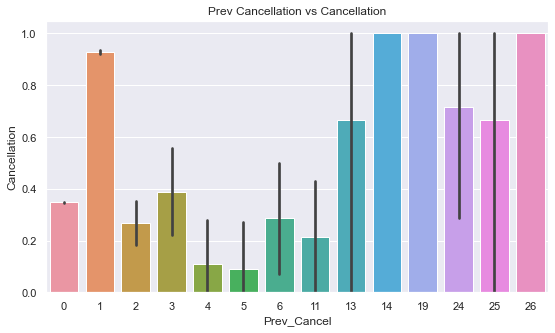

In [43]:
plt.title('Prev Cancellation vs Cancellation')
sns.barplot(x='Prev_Cancel',y='Cancellation',data=booking_hotels_df)

Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. For higher values of previous cancellations, numbers are very less and can be ignored.¶

# How much does the price in hotels vary over the year?¶

In [44]:
hotels_df['adr_']=hotels_df.Per_Day_Charges/hotels_df.Total_guest
monthlyadr_df=hotels_df.groupby(['Type_of_Hotel','Month'])['adr_'].mean()
monthlyadr_df=pd.DataFrame({"Type_of_Hotel":(map(lambda x:x[0],monthlyadr_df.index)), "Month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,Type_of_Hotel,Month,mean
0,Motel,April,61.149260
1,Motel,August,58.944559
2,Motel,December,48.762062
3,Motel,February,53.293139
4,Motel,January,51.289083
5,Motel,July,58.958966
6,Motel,June,66.178226
7,Motel,March,52.865688
8,Motel,May,68.384738
9,Motel,November,56.518456


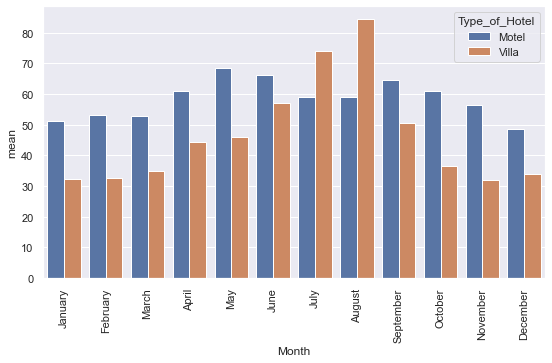

In [45]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y= 'mean', x= 'Month', data= monthlyadr_df, hue= 'Type_of_Hotel', order= month_sorted)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Reserved_Room', ylabel='adr_'>

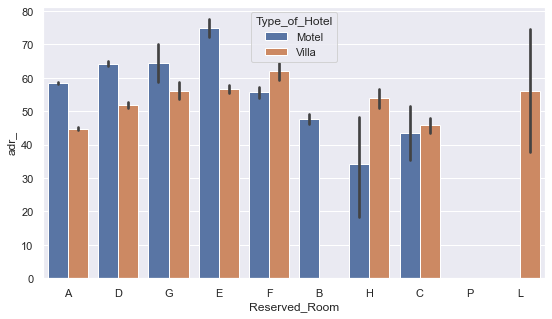

In [46]:
# plotting variation in adr with room type
sns.barplot(data = hotels_df, x = 'Reserved_Room', y = 'adr_', hue = 'Type_of_Hotel')


<AxesSubplot:xlabel='Meal', ylabel='adr_'>

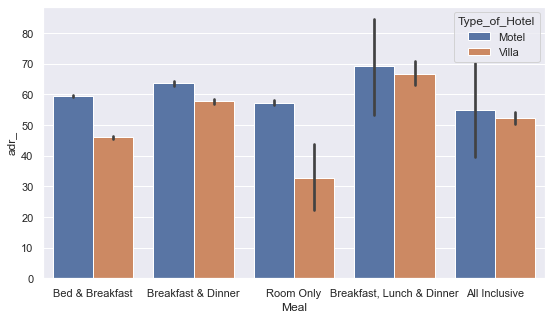

In [47]:
# plotting variation in adr with meal type
sns.barplot(data = hotels_df, x = 'Meal', y = 'adr_', hue = 'Type_of_Hotel')

<AxesSubplot:xlabel='Booking_Type', ylabel='adr_'>

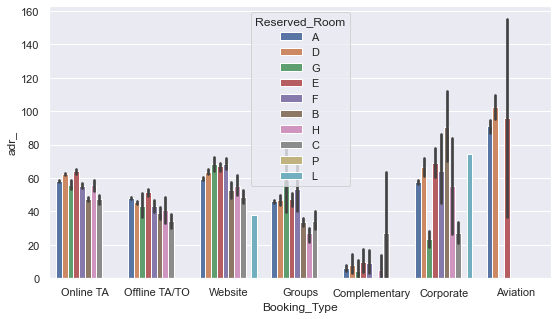

In [48]:
sns.barplot(x= 'Booking_Type', y= 'adr_', hue= 'Reserved_Room', data= hotels_df)

# Inferences and Conclusion

1) higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

2) The Motel type hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel. Guest numbers for the villa go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

3) Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

4) No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

5) cancellations are high for online and offline booking. Hotels need to do marketing and give special Discounts for online bookings.



# Task2 - Data Preprocessing

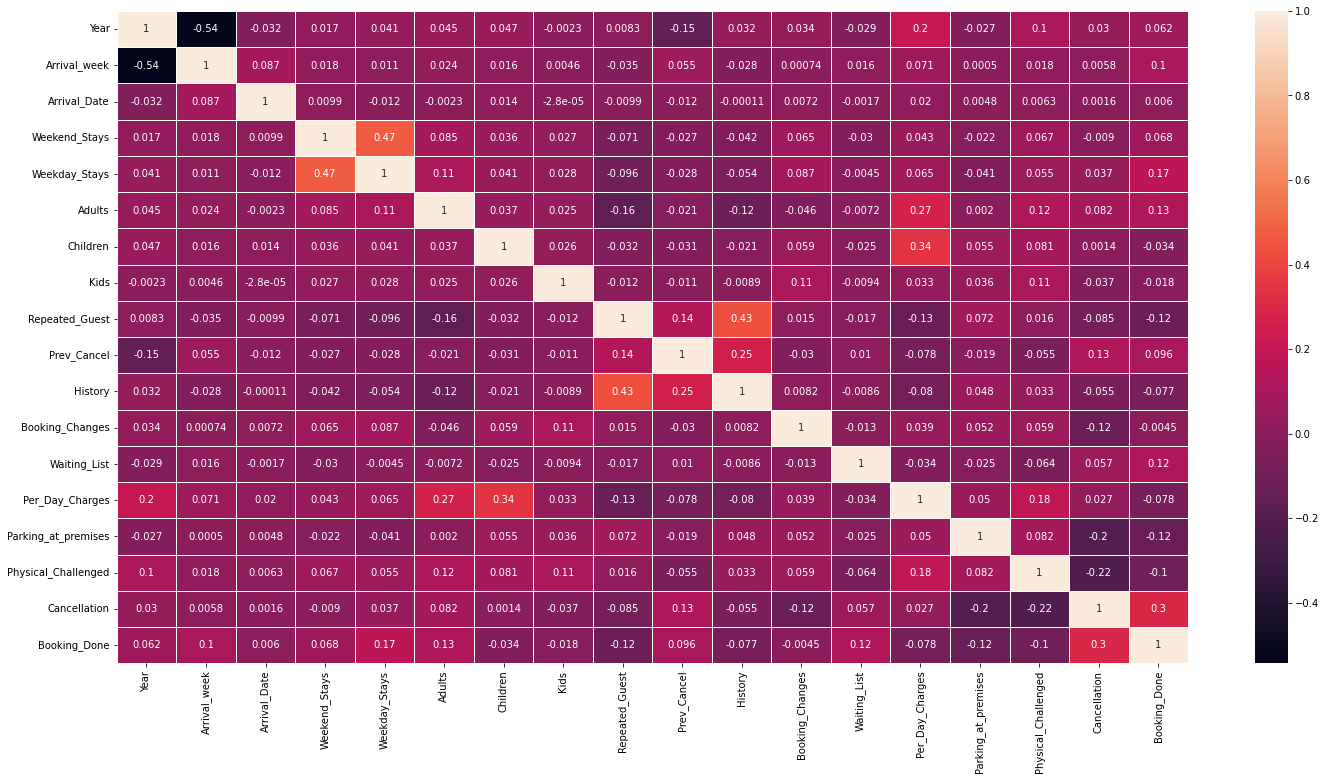

In [18]:
plt.figure(figsize=(24,12))

corr=booking_hotels.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [19]:
correlation=booking_hotels.corr()['Cancellation'].abs().sort_values(ascending=False)
correlation

Cancellation           1.000000
Booking_Done           0.298306
Physical_Challenged    0.222243
Parking_at_premises    0.201436
Prev_Cancel            0.127061
Booking_Changes        0.121808
Repeated_Guest         0.085175
Adults                 0.081939
Waiting_List           0.056811
History                0.055343
Weekday_Stays          0.037186
Kids                   0.036572
Year                   0.029818
Per_Day_Charges        0.026610
Weekend_Stays          0.009032
Arrival_week           0.005821
Arrival_Date           0.001626
Children               0.001366
Name: Cancellation, dtype: float64

In [20]:
booking_hotels_df.head()

,Type_of_Hotel,Year,Month,Reservation_Date,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Meal,Booking_Payment,Country,Booking_Type,Repeated_Guest,Prev_Cancel,History,Reserved_Room,Assigned_Room,Booking_Changes,Waiting_List,Customer,Per_Day_Charges,Parking_at_premises,Physical_Challenged,Reservation_Status,Cancellation,Booking_Done,Total_guest
0,Motel,2015,July,03-08-2015,31,28,2,3,Bed & Breakfast,No Deposit,PRT,Online TA,0,0,0,A,A,0,0,Contract,132.0,0,2,Check-Out,0,44,2
1,Villa,2016,August,30-08-2016,35,25,2,3,Bed & Breakfast,No Deposit,ESP,Online TA,0,0,0,A,A,1,0,Transient,150.0,1,1,Check-Out,0,27,2
2,Villa,2017,April,23-04-2017,16,21,1,1,Bed & Breakfast,No Deposit,FRA,Online TA,0,0,0,A,A,0,0,Transient-Party,44.0,0,1,Check-Out,0,180,1
3,Motel,2016,June,29-06-2016,27,27,2,0,Bed & Breakfast,No Deposit,AUT,Online TA,0,0,0,D,D,0,0,Transient,151.0,0,4,Check-Out,0,59,3
4,Motel,2016,August,22-08-2016,34,20,0,2,Breakfast & Dinner,No Deposit,DEU,Offline TA/TO,0,0,0,A,A,0,0,Transient-Party,115.0,0,1,Check-Out,0,313,2


In [21]:
booking_hotels_df.drop(['Country'], axis = 1, inplace = True)

In [22]:
cat_cols=[col for col in booking_hotels_df.columns if booking_hotels_df[col].dtype=='O']
cat_cols

['Type_of_Hotel',
 'Month',
 'Reservation_Date',
 'Meal',
 'Booking_Payment',
 'Booking_Type',
 'Reserved_Room',
 'Assigned_Room',
 'Customer',
 'Reservation_Status']

In [23]:
cat_booking_hotels_df=booking_hotels_df[cat_cols]

In [24]:
cat_booking_hotels_df.head()


,Type_of_Hotel,Month,Reservation_Date,Meal,Booking_Payment,Booking_Type,Reserved_Room,Assigned_Room,Customer,Reservation_Status
0,Motel,July,03-08-2015,Bed & Breakfast,No Deposit,Online TA,A,A,Contract,Check-Out
1,Villa,August,30-08-2016,Bed & Breakfast,No Deposit,Online TA,A,A,Transient,Check-Out
2,Villa,April,23-04-2017,Bed & Breakfast,No Deposit,Online TA,A,A,Transient-Party,Check-Out
3,Motel,June,29-06-2016,Bed & Breakfast,No Deposit,Online TA,D,D,Transient,Check-Out
4,Motel,August,22-08-2016,Breakfast & Dinner,No Deposit,Offline TA/TO,A,A,Transient-Party,Check-Out


In [25]:
cat_booking_hotels_df['Reservation_Date']=pd.to_datetime(cat_booking_hotels_df['Reservation_Date'])

cat_booking_hotels_df['year']=cat_booking_hotels_df['Reservation_Date'].dt.year
cat_booking_hotels_df['month']=cat_booking_hotels_df['Reservation_Date'].dt.month
cat_booking_hotels_df['day']=cat_booking_hotels_df['Reservation_Date'].dt.day

In [26]:
cat_booking_hotels_df.drop(['Reservation_Date','Month',],axis=1,inplace=True)

In [27]:
cat_booking_hotels_df.head()

,Type_of_Hotel,Meal,Booking_Payment,Booking_Type,Reserved_Room,Assigned_Room,Customer,Reservation_Status,year,month,day
0,Motel,Bed & Breakfast,No Deposit,Online TA,A,A,Contract,Check-Out,2015,3,8
1,Villa,Bed & Breakfast,No Deposit,Online TA,A,A,Transient,Check-Out,2016,8,30
2,Villa,Bed & Breakfast,No Deposit,Online TA,A,A,Transient-Party,Check-Out,2017,4,23
3,Motel,Bed & Breakfast,No Deposit,Online TA,D,D,Transient,Check-Out,2016,6,29
4,Motel,Breakfast & Dinner,No Deposit,Offline TA/TO,A,A,Transient-Party,Check-Out,2016,8,22


In [28]:
for col in cat_booking_hotels_df.columns:
    print(f'{col}:  \n{cat_booking_hotels_df[col].unique()}\n')

Type_of_Hotel:  
['Motel' 'Villa']

Meal:  
['Bed & Breakfast' 'Breakfast & Dinner' 'Room Only'
 'Breakfast, Lunch & Dinner' 'All Inclusive']

Booking_Payment:  
['No Deposit' 'Non Refund' 'Refundable']

Booking_Type:  
['Online TA' 'Offline TA/TO' 'Website' 'Corporate' 'Groups'
 'Complementary' 'Aviation']

Reserved_Room:  
['A' 'D' 'G' 'E' 'F' 'H' 'B' 'C' 'L' 'P']

Assigned_Room:  
['A' 'D' 'G' 'E' 'F' 'H' 'C' 'B' 'K' 'I']

Customer:  
['Contract' 'Transient' 'Transient-Party' 'Group']

Reservation_Status:  
['Check-Out' 'Canceled' 'No-Show']

year:  
[2015 2016 2017 2014]

month:  
[ 3  8  4  6  2 12  1 10  9  7  5 11]

day:  
[ 8 30 23 29 22  3  1  6 24 16  7 10  4  5 21 27 17  9 25 31  2 15 13 14
 28 18 20 11 26 19 12]



In [29]:
cat_df=cat_booking_hotels_df

In [30]:
cat_df['Type_of_Hotel']=cat_df['Type_of_Hotel'].map({'Motel':0 ,'Villa':1})


In [31]:
#cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [32]:
cat_df['Meal']=cat_df['Meal'].map({'Bed & Breakfast':0, 'Breakfast & Dinner':1, 'Room Only':2,
 'Breakfast, Lunch & Dinner':3, 'All Inclusive':4})


In [33]:
cat_df['Booking_Payment']=cat_df['Booking_Payment'].map({'No Deposit':0, 'Non Refund':1, 'Refundable':2})


In [34]:
cat_df['Booking_Type']=cat_df['Booking_Type'].map({'Online TA':0, 'Offline TA/TO':1, 'Website' 'Corporate':2, 'Groups':3,
 'Complementary':4, 'Aviation':5})


In [35]:
cat_df['Reserved_Room']=cat_df['Reserved_Room'].map({'A':0, 'D':1, 'G':2, 'E':3, 'F':4, 'H':5, 'B':6, 'C':7, 'L':8, 'P':9})


In [36]:
cat_df['Assigned_Room']=cat_df['Assigned_Room'].map({'A':0, 'D':1, 'G':2, 'E':3, 'F':4, 'H':5, 'C':6, 'B':7, 'K':8, 'I':9,})


In [37]:
cat_df['Customer']=cat_df['Customer'].map({'Contract':0, 'Transient':1, 'Transient-Party':2, 'Group':3})


In [38]:
cat_df['Reservation_Status']=cat_df['Reservation_Status'].map({'Check-Out':0, 'Canceled':1, 'No-Show':2})


In [39]:
cat_df['year']=cat_df['year'].map({2015:0, 2016:1, 2017:2, 2014:3})

In [40]:
cat_df.head()

,Type_of_Hotel,Meal,Booking_Payment,Booking_Type,Reserved_Room,Assigned_Room,Customer,Reservation_Status,year,month,day
0,0,0,0,0.0,0,0,0,0,0,3,8
1,1,0,0,0.0,0,0,1,0,1,8,30
2,1,0,0,0.0,0,0,2,0,2,4,23
3,0,0,0,0.0,1,1,1,0,1,6,29
4,0,1,0,1.0,0,0,2,0,1,8,22


In [41]:
num_df = booking_hotels_df.drop(columns = cat_cols, axis = 1)
num_df.drop("Cancellation", axis = 1, inplace = True)


In [42]:
num_df.drop('Year',axis=1, inplace = True)
num_df.drop("Physical_Challenged",axis=1,inplace=True)

In [43]:
num_df

,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Booking_Done,Total_guest
0,31,28,2,3,0,0,0,0,0,132.0,0,44,2
1,35,25,2,3,0,0,0,1,0,150.0,1,27,2
2,16,21,1,1,0,0,0,0,0,44.0,0,180,1
3,27,27,2,0,0,0,0,0,0,151.0,0,59,3
4,34,20,0,2,0,0,0,0,0,115.0,0,313,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,15,11,1,1,0,0,0,0,0,91.0,0,89,2
89996,17,19,0,1,0,0,0,0,0,84.0,0,190,2
89997,27,3,1,5,0,0,0,0,0,130.0,0,52,2
89998,52,22,2,2,0,0,0,1,0,142.0,1,57,3


In [44]:
num_df.var()

Arrival_week             184.611128
Arrival_Date              82.500516
Weekend_Stays              1.001256
Weekday_Stays              3.408618
Repeated_Guest             0.030132
Prev_Cancel                0.185885
History                    2.124960
Booking_Changes            0.423622
Waiting_List             178.891847
Per_Day_Charges         2283.557233
Parking_at_premises        0.060194
Booking_Done           12365.622345
Total_guest                0.446850
dtype: float64

In [45]:
num_df['Arrival_week']=np.log(num_df['Arrival_week']+1)
num_df['Arrival_Date']=np.log(num_df['Arrival_Date']+1)
num_df['Weekend_Stays']=np.log(num_df['Weekend_Stays']+1)
num_df['Weekday_Stays']=np.log(num_df['Repeated_Guest']+1)
num_df['Repeated_Guest']=np.log(num_df['Arrival_week']+1)
num_df['Prev_Cancel']=np.log(num_df['Prev_Cancel']+1)
num_df['History']=np.log(num_df['History']+1)
num_df['Booking_Changes']=np.log(num_df['Booking_Changes']+1)
num_df['Per_Day_Charges']=np.log(num_df['Per_Day_Charges']+1)
num_df['Parking_at_premises ']=np.log(num_df['Parking_at_premises']+1)
num_df['Waiting_List']=np.log(num_df['Waiting_List']+1)
num_df['Booking_Done']=np.log(num_df['Booking_Done']+1)
num_df['Total_guest']=np.log(num_df['Total_guest']+1)


In [46]:
num_df.var()

Arrival_week            0.435203
Arrival_Date            0.552525
Weekend_Stays           0.254839
Weekday_Stays           0.014477
Repeated_Guest          0.034691
Prev_Cancel             0.027575
History                 0.070425
Booking_Changes         0.107772
Waiting_List            0.293158
Per_Day_Charges         0.441282
Parking_at_premises     0.060194
Booking_Done            2.588963
Total_guest             0.045807
Parking_at_premises     0.028821
dtype: float64

In [47]:
num_df.head()

,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Booking_Done,Total_guest,Parking_at_premises
0,3.465736,3.367296,1.098612,0.0,1.496434,0.0,0.0,0.000000,0.0,4.890349,0,3.806662,1.098612,0.000000
1,3.583519,3.258097,1.098612,0.0,1.522467,0.0,0.0,0.693147,0.0,5.017280,1,3.332205,1.098612,0.693147
2,2.833213,3.091042,0.693147,0.0,1.343703,0.0,0.0,0.000000,0.0,3.806662,0,5.198497,0.693147,0.000000
3,3.332205,3.332205,1.098612,0.0,1.466077,0.0,0.0,0.000000,0.0,5.023881,0,4.094345,1.386294,0.000000
4,3.555348,3.044522,0.000000,0.0,1.516302,0.0,0.0,0.000000,0.0,4.753590,0,5.749393,1.098612,0.000000


In [48]:
X=pd.concat([cat_df,num_df],axis=1)
Y=booking_hotels_df['Cancellation']

In [49]:
X.shape, Y.shape

((89875, 25), (89875,))

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [51]:
X_train.head()

,Type_of_Hotel,Meal,Booking_Payment,Booking_Type,Reserved_Room,Assigned_Room,Customer,Reservation_Status,year,month,day,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Booking_Done,Total_guest,Parking_at_premises
45136,0,0,0,NaN,0,0,1,0,0,8,19,3.555348,2.944439,0.0,0.0,1.516302,0.0,0.0,0.0,0.0,4.189655,0,2.772589,1.098612,0.0
46555,0,0,0,0.0,0,0,1,1,1,5,6,3.583519,3.135494,0.0,0.0,1.522467,0.0,0.0,0.0,0.0,4.672829,0,5.463832,1.098612,0.0
46728,0,0,0,0.0,1,1,1,1,1,11,12,1.609438,3.178054,0.0,0.0,0.959135,0.0,0.0,0.0,0.0,4.369448,0,3.970292,1.098612,0.0
18924,0,0,0,1.0,0,0,2,0,0,6,12,3.912023,1.609438,0.0,0.0,1.591686,0.0,0.0,0.0,0.0,4.189655,0,4.077537,1.098612,0.0
4196,0,0,1,3.0,0,0,1,1,0,10,21,3.295837,3.178054,0.0,0.0,1.457646,0.0,0.0,0.0,0.0,4.219508,0,5.860786,0.693147,0.0


In [52]:
X_test.head()

,Type_of_Hotel,Meal,Booking_Payment,Booking_Type,Reserved_Room,Assigned_Room,Customer,Reservation_Status,year,month,day,Arrival_week,Arrival_Date,Weekend_Stays,Weekday_Stays,Repeated_Guest,Prev_Cancel,History,Booking_Changes,Waiting_List,Per_Day_Charges,Parking_at_premises,Booking_Done,Total_guest,Parking_at_premises
20148,0,2,0,0.0,0,0,1,0,1,4,19,2.890372,2.944439,0.000000,0.0,1.358505,0.0,0.0,0.693147,0.0,4.736198,0,0.000000,0.693147,0.0
37343,0,0,0,1.0,0,4,1,0,0,9,21,3.663562,2.995732,0.693147,0.0,1.539779,0.0,0.0,0.000000,0.0,4.442651,0,3.178054,1.098612,0.0
17198,0,2,0,NaN,1,1,1,0,1,4,3,2.397895,3.401197,0.693147,0.0,1.223156,0.0,0.0,0.000000,0.0,4.574711,0,2.639057,1.098612,0.0
83876,1,0,0,1.0,0,7,0,0,0,7,9,3.637586,1.945910,0.000000,0.0,1.534194,0.0,0.0,0.000000,0.0,0.000000,0,4.143135,1.098612,0.0
45789,1,1,1,3.0,0,0,1,1,1,8,18,1.609438,2.890372,0.693147,0.0,0.959135,0.0,0.0,0.000000,0.0,4.094345,0,5.123964,0.693147,0.0


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

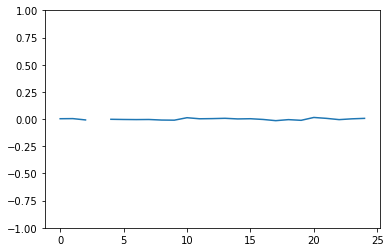

In [54]:
plt.ylim(-1,1)
means=[]
    
for i in range(X.shape[1]):
    means.append(np.mean(X_test[:,i]))
plt.plot(means, scaley=False)

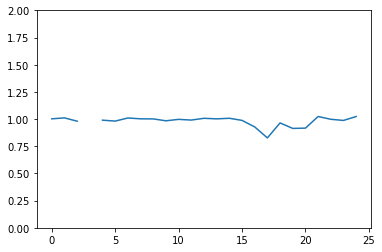

In [55]:
#varience
plt.ylim(0,2)
vars=[]

for i in range(X.shape[1]):
    vars.append(np.var(X_test[:,i]))
plt.plot(vars,scaley=False)

# hypothesis testing

1) The type of hotels have differn in cancellation  

In [9]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

In [10]:
booking_hotels.Type_of_Hotel.value_counts()

Motel    60192
Villa    29808
Name: Type_of_Hotel, dtype: int64

1. State the H0 and Ha

   H0: x̄1 = x̄2, or x̄2 - x̄1 = 0, there is no difference in cancellation with hotel types

   HA: x̄2 ≠ x̄1, or x̄2 - x̄1 ≠ 0, there is a difference in cancellation with hotel types

2. Decide the significance level: alpha = 0.05

3. Identify the test-statistic: 2 sample t - test

4. Calculate P_value using test-statistic/t-score

In [11]:
Motel_cancellation = booking_hotels[booking_hotels['Type_of_Hotel'] == 'Motel'].Cancellation
villa_cancellation = booking_hotels[booking_hotels['Type_of_Hotel'] == 'Villa'].Cancellation

t_statistic, p_value = ttest_ind(Motel_cancellation,villa_cancellation)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 35.13755934879142
p_value = 1.2041684905634552e-268


In [12]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True
